In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [2]:
pet_df = pd.read_csv("/home/jh20/Data/pet/pet_df.csv")

In [53]:
b

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 12711
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            739 non-null    object 
 1   age              739 non-null    float64
 2   sex              739 non-null    object 
 3   weight           739 non-null    float64
 4   shoulder_height  739 non-null    float64
 5   neck_size        739 non-null    float64
 6   back_length      739 non-null    float64
 7   chest_size       739 non-null    float64
 8   exercise         739 non-null    int64  
 9   food_count       739 non-null    int64  
 10  food_amount      739 non-null    float64
 11  snack_amount     739 non-null    float64
 12  BCS              739 non-null    int64  
 13  heavy            739 non-null    object 
 14  day_food_amount  739 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 92.4+ KB


In [54]:
# 0: thin
# 1: ideal
# 2: heavy

df.heavy.value_counts()

1    472
2    191
0     76
Name: heavy, dtype: int64

<Figure size 2880x2880 with 0 Axes>

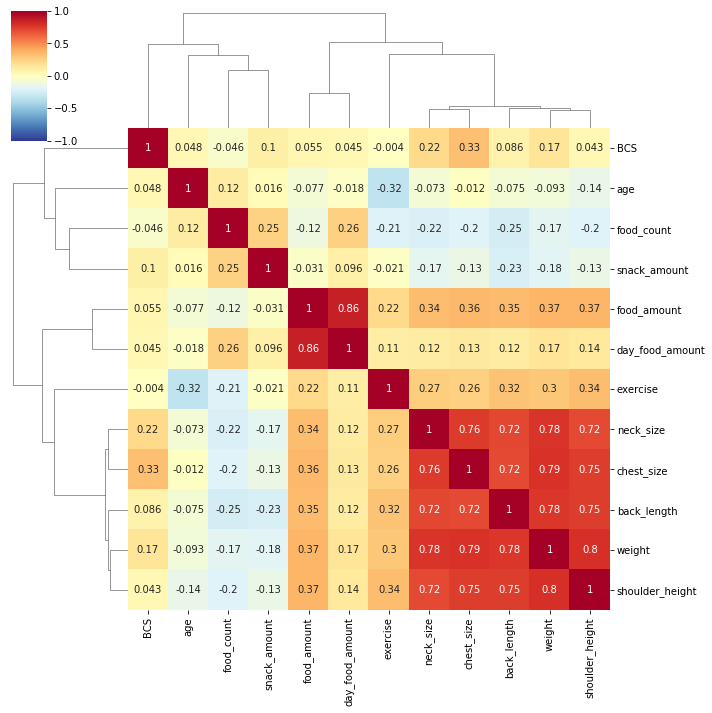

In [55]:
corr_df = df.corr()
plt.figure(figsize = (40, 40))
sns.clustermap(corr_df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

# BCS말고 heavy 변수로 분류 도전

In [56]:
df = df.loc[df['breed'] == 'MAL']
df = df[['age', 'sex', 'weight', 'shoulder_height', 'neck_size',
       'back_length', 'chest_size', 'exercise', 'day_food_amount', 'heavy']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 140 to 12520
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              168 non-null    float64
 1   sex              168 non-null    object 
 2   weight           168 non-null    float64
 3   shoulder_height  168 non-null    float64
 4   neck_size        168 non-null    float64
 5   back_length      168 non-null    float64
 6   chest_size       168 non-null    float64
 7   exercise         168 non-null    int64  
 8   day_food_amount  168 non-null    float64
 9   heavy            168 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 14.4+ KB


<Figure size 2880x2880 with 0 Axes>

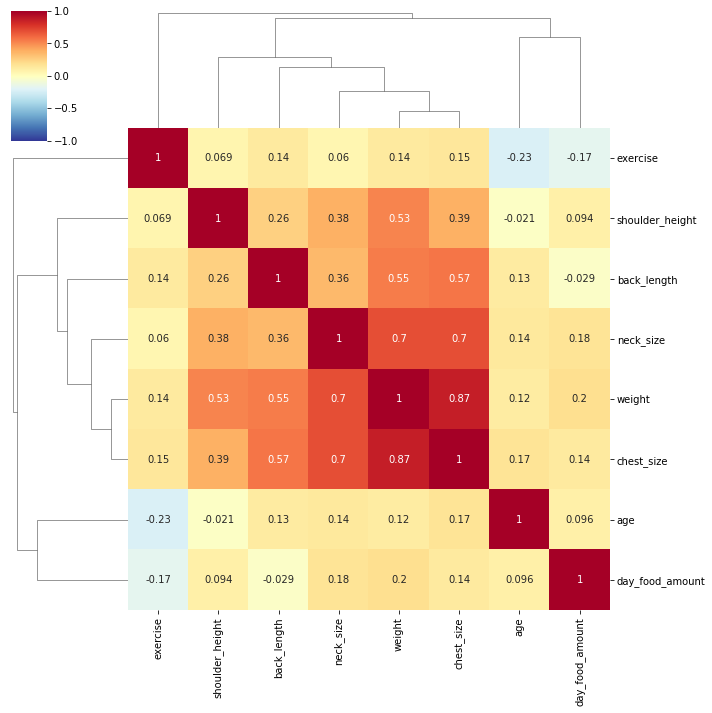

In [57]:
corr_df = df.corr()
plt.figure(figsize = (40, 40))
sns.clustermap(corr_df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

In [26]:
df.heavy.value_counts()

1    99
2    41
0    28
Name: heavy, dtype: int64

In [58]:
### train, test 데이터 분리
train, test = train_test_split(df,
                               test_size = 0.3,
                               random_state = 0,
                               stratify = df['heavy'])

train_X = train[train.columns[:-1]]
train_y = train[train.columns[-1:]]
test_X = test[test.columns[:-1]]
test_y = test[test.columns[-1:]]
X = df[df.columns[:-1]]
y = df[df.columns[-1:]]

predictor = ['sex','exercise']

train_X_dummy = pd.get_dummies(train_X, columns = predictor, drop_first = True)
test_X_dummy = pd.get_dummies(test_X, columns = predictor, drop_first = True)

In [29]:
train_y.value_counts().sort_index()

heavy
0        19
1        69
2        29
dtype: int64

In [30]:
test_y.value_counts()

heavy
1        30
2        12
0         9
dtype: int64

In [31]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 3195 to 8875
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              117 non-null    float64
 1   sex              117 non-null    object 
 2   weight           117 non-null    float64
 3   shoulder_height  117 non-null    float64
 4   neck_size        117 non-null    float64
 5   back_length      117 non-null    float64
 6   chest_size       117 non-null    float64
 7   exercise         117 non-null    int64  
 8   day_food_amount  117 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.1+ KB


In [32]:
train_X_dummy

,age,weight,shoulder_height,neck_size,back_length,chest_size,day_food_amount,sex_IF,sex_IM,sex_SF,exercise_2,exercise_3
3195,7.0,3.70,24.0,23.0,32.0,35.0,2.400,0,0,0,0,0
5765,14.0,3.12,23.0,22.0,35.0,35.0,0.800,0,0,1,0,0
6891,11.8,2.70,22.5,20.0,25.0,34.0,1.400,0,0,1,0,0
3714,8.3,2.30,19.0,19.0,19.0,31.0,1.800,1,0,0,0,0
11897,1.0,2.10,22.0,22.0,26.0,26.0,1.010,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10348,7.0,1.70,19.0,19.0,25.0,29.0,1.200,0,0,0,1,0
2827,9.0,3.30,23.0,22.0,33.0,36.0,2.620,0,0,0,1,0
2968,7.0,3.50,23.0,22.0,22.0,36.0,2.400,1,0,0,1,0
6465,2.0,3.29,18.0,19.0,33.0,36.0,0.603,0,0,1,1,0


# 랜덤포레스트

In [59]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100], 
    "max_depth": [6, 8, 10, 12], 
    "min_samples_leaf": [8, 12, 18], 
    "min_samples_split": [8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 10, n_jobs = -1)
grid_cv.fit(train_X_dummy, train_y)

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [60]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.5902


In [51]:
best_rt_clf = grid_cv.best_estimator_
rt_pred = best_rt_clf.predict(test_X_dummy)
acc = metrics.accuracy_score(test_y, rt_pred)
print(f"예측 정확도:{acc: .4f}")

예측 정확도: 0.5882


In [52]:
rt_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [61]:
### RandomForest Classification Model

model = RandomForestClassifier(n_estimators = 100,
                               max_depth = 6,
                               min_samples_leaf = 8,
                               min_samples_split = 20,
                               random_state = 11,
                               n_jobs = -1)

model.fit(train_X_dummy, train_y)
prediction_rf = model.predict(test_X_dummy)
print('Accuracy for Random Forests is',
      metrics.accuracy_score(prediction_rf, test_y)) # 분류 정확도

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy for Random Forests is 0.5882352941176471


In [62]:
estimator = model.estimators_[3]
estimator

DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=8,
                       min_samples_split=20, random_state=707468379)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


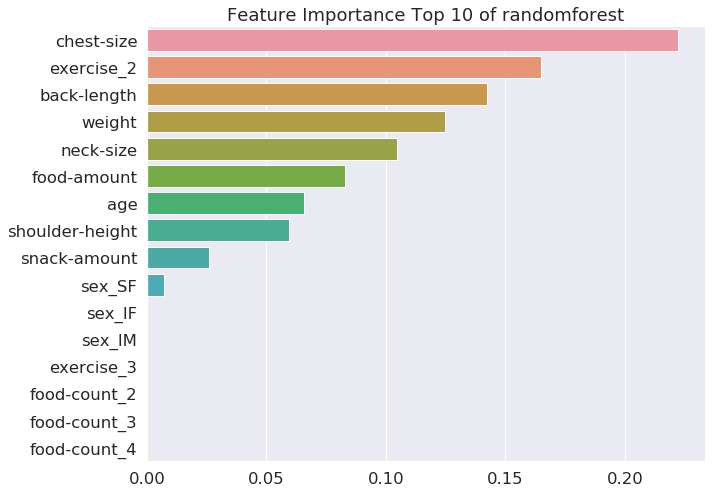

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
# Feature Importance
ft_importance_value = model.feature_importances_
ft_series = pd.Series(ft_importance_value, index = train_X_dummy.columns)
ft_top10 = ft_series.sort_values(ascending = False)

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (10, 8))
plt.title('Feature Importance Top 10 of randomforest')
sns.barplot(x = ft_top10, y = ft_top10.index)
plt.show()

In [39]:
prediction_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [65]:
train_X.columns

Index(['age', 'sex', 'weight', 'shoulder_height', 'neck_size', 'back_length',
       'chest_size', 'exercise', 'day_food_amount'],
      dtype='object')

In [85]:
os.environ["PATH"]

'/home/jh20/anaconda3/bin:/home/jh20/anaconda3/condabin:/home/jh20/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:C:/Program Files (x86)/Graphviz2.38/bin/'

In [84]:
from sklearn.tree import export_graphviz
from subprocess import check_call
export_graphviz(
    estimator, # 학습한 모형
    out_file = './iris_tree_model.dot', # .dot 파일 저장 위치
    #feature_names = iris.feature_names[2:], # 사용한 변수 이름
    #class_names = iris.target_names, # 예측할 타겟 클래스 이름
    #rounded=True, # 사각형 끝을 둥글게
    #filled=True # 사각형 안 색깔 채우기
)
# 예측한 모형 png로 바꿔서, 시각화 하기
check_call(['dot','-Tpng','iris_tree_model.dot','-o','OutputFile.png'])

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

In [82]:
from sklearn.tree import export_graphviz



export_graphviz(estimator, out_file = 'tree.dot', 
                #feature_names = train_X.columns,
                #class_names = ['1', '2', '3'],
                max_depth = 6, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )
                
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import graphviz 

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# dot 파일 이미지로 저장하기
#dot = graphviz.Source(dot_graph)
#dot.format='png'
#dot.render(filename='tree')

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

- 그마저도 예측이 이상함..

# overweight vs not으로 만들어보자..

In [91]:
df = pet_df.drop_duplicates('mission-id')
df = df[['breed', 'age', 'sex', 'weight', 'shoulder-height',
         'neck-size', 'back-length', 'chest-size',
         'exercise', 'food-count', 'food-amount',
         'snack-amount', 'BCS']]

df.columns = ['breed', 'age', 'sex', 'weight', 'shoulder_height',
              'neck_size', 'back_length', 'chest_size',
              'exercise', 'food_count', 'food_amount',
              'snack_amount', 'BCS']
df['overweight'] = '0'
df.loc[df['BCS'] > 5, 'overweight'] = '1'

df['day_food_amount'] = np.NaN
df['day_food_amount'] = round(df['food_amount'] * df['food_count'] + df['food_count'] * df['snack_amount'] * 0.01, 3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 12711
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            739 non-null    object 
 1   age              739 non-null    float64
 2   sex              739 non-null    object 
 3   weight           739 non-null    float64
 4   shoulder_height  739 non-null    float64
 5   neck_size        739 non-null    float64
 6   back_length      739 non-null    float64
 7   chest_size       739 non-null    float64
 8   exercise         739 non-null    int64  
 9   food_count       739 non-null    int64  
 10  food_amount      739 non-null    float64
 11  snack_amount     739 non-null    float64
 12  BCS              739 non-null    int64  
 13  overweight       739 non-null    object 
 14  day_food_amount  739 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 92.4+ KB


In [93]:
df = df.loc[df['breed'] == 'MAL']
df = df[['age', 'sex', 'weight', 'shoulder_height', 'neck_size',
       'back_length', 'chest_size', 'exercise', 'day_food_amount', 'overweight']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 140 to 12520
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              168 non-null    float64
 1   sex              168 non-null    object 
 2   weight           168 non-null    float64
 3   shoulder_height  168 non-null    float64
 4   neck_size        168 non-null    float64
 5   back_length      168 non-null    float64
 6   chest_size       168 non-null    float64
 7   exercise         168 non-null    int64  
 8   day_food_amount  168 non-null    float64
 9   overweight       168 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 14.4+ KB


In [94]:
### train, test 데이터 분리
train, test = train_test_split(df,
                               test_size = 0.3,
                               random_state = 0,
                               stratify = df['overweight'])

train_X = train[train.columns[:-1]]
train_y = train[train.columns[-1:]]
test_X = test[test.columns[:-1]]
test_y = test[test.columns[-1:]]
X = df[df.columns[:-1]]
y = df[df.columns[-1:]]

predictor = ['sex','exercise']

train_X_dummy = pd.get_dummies(train_X, columns = predictor, drop_first = True)
test_X_dummy = pd.get_dummies(test_X, columns = predictor, drop_first = True)

In [95]:
df

,age,sex,weight,shoulder_height,neck_size,back_length,chest_size,exercise,day_food_amount,overweight
140,7.0,CM,3.39,20.0,25.0,10.0,32.98,1,2.00,0
209,0.0,IM,2.91,21.0,21.0,19.0,34.00,1,1.00,1
222,18.0,SF,2.99,21.0,21.0,19.0,34.00,1,1.00,0
458,1.0,IF,1.70,20.0,16.0,24.0,28.00,2,0.76,0
476,12.0,CM,6.00,22.0,27.0,23.0,47.00,1,1.60,1
...,...,...,...,...,...,...,...,...,...,...
11916,2.0,IF,2.50,25.0,22.0,28.0,30.00,2,1.01,0
12435,9.0,SF,3.10,22.0,22.0,23.0,33.00,1,4.60,1
12453,8.0,CM,3.20,25.0,20.0,23.0,34.00,1,4.60,1
12472,9.8,CM,3.69,27.0,28.0,35.0,39.00,2,1.00,0


In [96]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100], 
    "max_depth": [6, 8, 10, 12], 
    "min_samples_leaf": [8, 12, 18], 
    "min_samples_split": [8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 10, n_jobs = -1)
grid_cv.fit(train_X_dummy, train_y)

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [97]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.7523


In [98]:
### RandomForest Classification Model

model = RandomForestClassifier(n_estimators = 100,
                               max_depth = 6,
                               min_samples_leaf = 8,
                               min_samples_split = 8,
                               random_state = 11,
                               n_jobs = -1)

model.fit(train_X_dummy, train_y)
prediction_rf = model.predict(test_X_dummy)
print('Accuracy for Random Forests is',
      metrics.accuracy_score(prediction_rf, test_y)) # 분류 정확도

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy for Random Forests is 0.7647058823529411


In [102]:
metrics.f1_score(prediction_rf, test_y, average = 'macro')

0.5032467532467532

In [99]:
prediction_rf

array(['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
      dtype=object)

In [103]:
test_y.index

,overweight
556,1
11606,0
10584,0
11262,0
4609,0
5397,0
6989,1
9800,0
3135,0
11916,0


/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

In [101]:
test_y.value_counts()

overweight
0             39
1             12
dtype: int64

In [141]:
list(map(np.argmax, grid_cv2.predict_proba(new_test_X)))

[2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2]

In [128]:
# 예측 결과..
print(id_list)

[4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 5, 4, 5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5]


In [130]:
### RandomForest Classification Model
model2 = RandomForestClassifier(n_estimators = 100,
                                max_depth = 4,
                                min_samples_leaf = 18,
                                min_samples_split = 8,
                                random_state = 11,
                                n_jobs = -1)

model2.fit(new_train_X, new_train_y)
prediction_rf2 = model2.predict(new_test_X)

print('Accuracy for Random Forests is',
      metrics.accuracy_score(prediction_rf2, new_test_y)) # 분류 정확도

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Accuracy for Random Forests is 0.3333333333333333


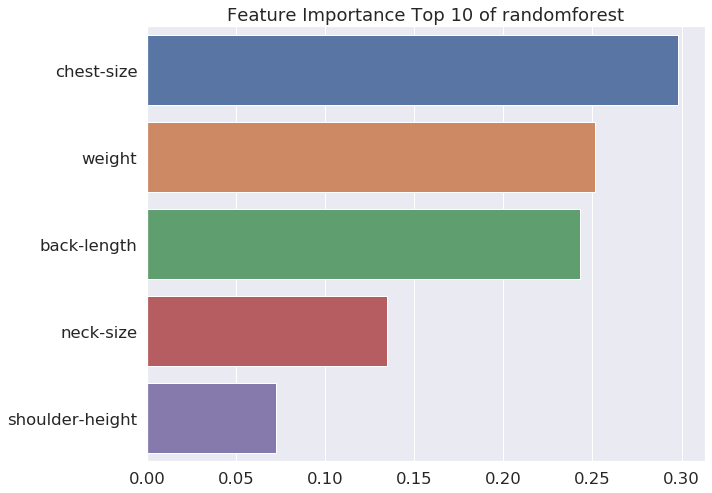

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Importance
ft_importance_value2 = model2.feature_importances_
ft_series2 = pd.Series(ft_importance_value2, index = new_train_X.columns)
ft_var2 = ft_series2.sort_values(ascending = False)

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (10, 8))
plt.title('Feature Importance Top 10 of randomforest')
sns.barplot(x = ft_var2, y = ft_var2.index)
plt.show()

In [133]:
y_cv_pred = cross_val_predict(model2, new_train_X, new_train_y, cv = 10)

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1045: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1045: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1045: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [134]:
y_cv_pred

array([5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 4,
       5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 5,
       5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 5, 4, 5,
       5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 5, 4, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5,
       5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5])

# Decision Tree Classification

In [148]:
model_tree = DecisionTreeClassifier()
model_tree.fit(train_X_dummy, train_y)
pred_tree = model_tree.predict(test_X_dummy)
print('Accuracy for Decision Tree is', metrics.accuracy_score(pred_tree, test_y))

Accuracy for Decision Tree is 0.30612244897959184


# Extremely Randomized trees

In [152]:
from sklearn.ensemble import ExtraTreesClassifier
model_Extree = ExtraTreesClassifier()
model_Extree.fit(train_X_dummy, train_y)
pred_Extree = model_Extree.predict(test_X_dummy)
print('Accuracy for Extremely Randomized Trees is ', metrics.accuracy_score(pred_Extree, test_y))

Accuracy for Extremely Randomized Trees is  0.30612244897959184


/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [266]:
model_Extree.fit(train_X_dummy, train_y).accuracy_score()

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


AttributeError: 'ExtraTreesClassifier' object has no attribute 'accuracy_score'

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

# xgboost

In [157]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(train_X_dummy, train_y)
pred_xg = model_xg.predict(test_X_dummy)
print('Accuracy for xgboost is ', metrics.accuracy_score(pred_xg, test_y))

[21:39:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for xgboost is  0.2653061224489796


/home/jh20/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, wa

In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(train_X_dummy, train_y)
pred_xg = model_xg.predict(test_X_dummy)
print('Accuracy for xgboost is ', metrics.accuracy_score(pred_xg, test_y))

In [160]:
xg = model_xg.predict_proba(test_X_dummy)
xg_list = []
for i in xg:
    xg_list.append(i.argmax() + 3)

In [162]:
print(xg_list)

[5, 6, 3, 6, 6, 6, 6, 5, 6, 4, 4, 5, 6, 4, 7, 6, 5, 4, 4, 5, 3, 7, 4, 5, 3, 4, 5, 6, 3, 3, 3, 3, 5, 6, 5, 4, 4, 4, 3, 3, 5, 5, 5, 5, 4, 5, 4, 4, 5]


# RandomForest Regressor

In [164]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(train_X_dummy, train_y)
pred_rf_reg = rf_reg.predict(test_X_dummy)
print('RMSE for Extremely Randomized Trees is ', metrics.accuracy_score(pred_Extree, test_y))

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [186]:
pred_rf_reg

array([5.02, 5.86, 4.02, 5.99, 5.04, 5.24, 4.3 , 4.84, 5.42, 3.71, 4.7 ,
       5.51, 5.17, 3.71, 6.33, 5.9 , 4.8 , 4.62, 3.86, 5.17, 4.22, 6.09,
       4.8 , 4.98, 3.66, 3.62, 5.1 , 6.18, 3.35, 4.09, 4.14, 3.56, 4.81,
       5.9 , 5.04, 4.47, 4.81, 3.82, 4.03, 3.75, 5.53, 4.74, 4.35, 4.87,
       4.61, 4.71, 3.87, 3.91, 4.48])

In [203]:
test_ind = test_y.BCS.index
pred_series = pd.Series(pred_rf_reg)
pred_series.index = test_ind

In [206]:
pred_series

4508     5.02
9022     5.86
209      4.02
2751     5.99
3694     5.04
6494     5.24
140      4.30
660      4.84
11094    5.42
6834     3.71
10172    4.70
8248     5.51
9055     5.17
12435    3.71
6911     6.33
4382     5.90
4609     4.80
6989     4.62
10519    3.86
11682    5.17
8875     4.22
5569     6.09
7339     4.80
10838    4.98
5016     3.66
3905     3.62
6465     5.10
7833     6.18
6000     3.35
3135     4.09
222      4.14
10584    3.56
795      4.81
11797    5.90
5293     5.04
7558     4.47
11765    4.81
8080     3.82
751      4.03
2789     3.75
9745     5.53
695      4.74
12453    4.35
8025     4.87
8579     4.61
3579     4.71
6774     3.87
2478     3.91
4448     4.48
dtype: float64

In [209]:
result = pd.concat([test_y, pred_series], axis = 1)
result.columns = ['true_BCS', 'pred_BCS']
result

,true_BCS,pred_BCS
4508,7,5.02
9022,3,5.86
209,7,4.02
2751,4,5.99
3694,3,5.04
6494,4,5.24
140,5,4.30
660,4,4.84
11094,6,5.42
6834,4,3.71


In [210]:
result.sort_values('pred_BCS')

,true_BCS,pred_BCS
6000,3,3.35
10584,5,3.56
3905,5,3.62
5016,5,3.66
12435,6,3.71
6834,4,3.71
2789,3,3.75
8080,5,3.82
10519,4,3.86
6774,3,3.87


In [175]:
print('RMSE for Extremely Randomized Trees is ',
      metrics.mean_squared_error(test_y, pred_rf_reg, squared = False))

RMSE for Extremely Randomized Trees is  1.2286860411655625


# 품종을 포메로 선회

In [251]:
df = pet_df.drop_duplicates('mission-id')
df = df.loc[df['breed'] == 'POM']
df = df[['age', 'sex', 'weight', 'shoulder-height',
         'neck-size', 'back-length', 'chest-size',
         'exercise', 'food-count', 'food-amount',
         'snack-amount', 'BCS']]
df = df.loc[(df['BCS'] < 8) & (df['BCS'] > 2)]
df = df[['weight', 'shoulder-height', 'neck-size',
         'back-length', 'chest-size', 'BCS']]

In [252]:
df.BCS.value_counts()

5    46
6    33
4    23
7     8
3     3
Name: BCS, dtype: int64

<Figure size 2880x2880 with 0 Axes>

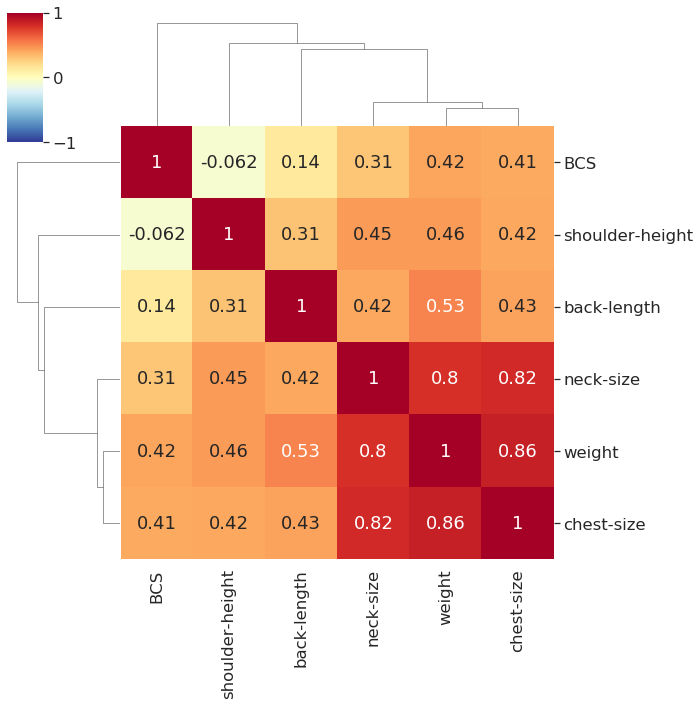

In [253]:
corr_df = df.corr()
plt.figure(figsize = (40, 40))
sns.clustermap(corr_df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

In [254]:
### train, test 데이터 분리
train, test = train_test_split(df, test_size = 0.3, random_state = 0, stratify = df['BCS'])

train_X = train[train.columns[:-1]]
train_y = train[train.columns[-1:]]
test_X = test[test.columns[:-1]]
test_y = test[test.columns[-1:]]
X = df[df.columns[:-1]]
y = df[df.columns[-1:]]

In [255]:
train_X

,weight,shoulder-height,neck-size,back-length,chest-size
12399,3.50,19.0,20.0,22.0,36.0
10056,3.50,25.0,23.0,22.0,35.0
9669,4.42,30.0,26.0,27.0,41.0
5134,4.49,21.0,31.0,28.0,39.0
11471,4.80,24.0,26.0,32.0,40.0
...,...,...,...,...,...
11243,10.54,37.0,33.0,36.0,54.0
5252,3.49,25.0,25.0,30.0,38.0
12055,2.94,27.5,21.0,30.0,34.0
1522,3.60,22.0,24.0,26.0,36.0


In [258]:
test_X

,weight,shoulder-height,neck-size,back-length,chest-size
613,3.39,25.0,25.0,24.0,36.99
2196,2.50,22.0,20.0,25.0,34.00
9224,3.77,29.0,22.0,30.0,39.00
5325,2.44,24.0,20.0,31.0,30.00
4658,3.12,23.0,23.0,35.0,35.00
2429,2.80,21.0,20.0,22.0,34.00
7871,4.26,30.0,24.0,31.0,41.00
2647,2.60,16.0,18.0,25.0,31.00
4778,4.20,26.0,25.0,30.0,34.00
4936,4.58,28.5,22.0,27.0,38.50


In [256]:
train_y.value_counts()

BCS
5      32
6      23
4      16
7       6
3       2
dtype: int64

In [257]:
test_y.value_counts()

BCS
5      14
6      10
4       7
7       2
3       1
dtype: int64

In [283]:
### RandomForest Classification Model

model_rf = RandomForestClassifier()
model_rf.fit(train_X, train_y)
pred_rf = model_rf.predict(test_X)

print('Accuracy for Random Forests is',
      metrics.f1_score(pred_rf, test_y, average = 'macro')) # 분류 정확도

Accuracy for Random Forests is 0.24555555555555558


/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [284]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

params = { 'n_estimators' : [10, 100],
           'max_depth' : [n for n in range(1, 30)],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1, verbose = 0)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1,
                       scoring = make_scorer(f1_score, average = 'macro'))
grid_cv.fit(train_X, train_y)

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  UserWarning,
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]},
             scoring=make_scorer(f1_score, average=macro))

In [285]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 f1_score: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 1, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 f1_score: 0.2130


/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jh20/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarni

In [272]:
pred_rf

array([5, 4, 5, 4, 4, 5, 5, 4, 4, 6, 5, 5, 5, 6, 6, 5, 5, 5, 4, 6, 5, 5,
       5, 5, 6, 5, 5, 6, 4, 7, 5, 6, 4, 6])

In [280]:
grid_rf = grid_cv.predict_proba(test_X)
rf_list = []
for i in grid_rf:
    rf_list.append(i.argmax() + 3)

print(rf_list)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5]


In [274]:
rf_no = model_rf.predict_proba(test_X)
rf_no_list = []
for i in rf_no:
    rf_no_list.append(i.argmax() + 3)

print(rf_no_list)

[5, 4, 5, 4, 4, 5, 5, 4, 4, 6, 5, 5, 5, 6, 6, 5, 5, 5, 4, 6, 5, 5, 5, 5, 6, 5, 5, 6, 4, 7, 5, 6, 4, 6]
